Training with learning rate: 0.1
Iterations to converge (or maximum reached): 65
Final weights: [-0.32543339 -0.35854235]
Final bias: 0.30276337607164405
Accuracy: 87.88%


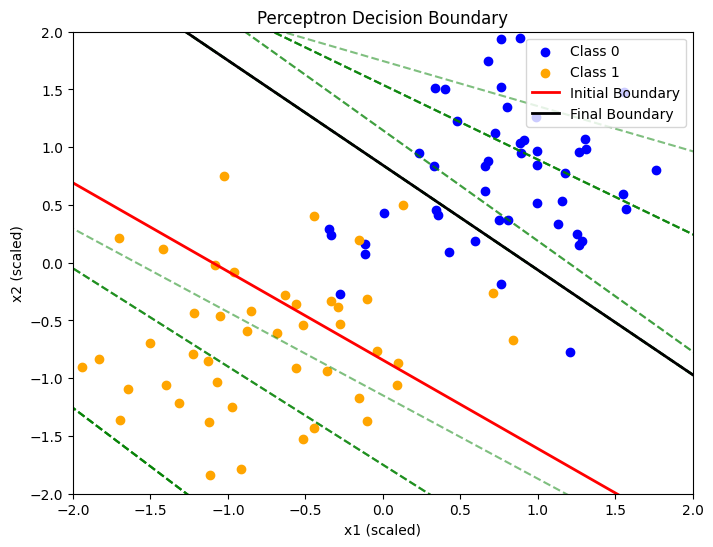

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Function: Compute Decision Boundary Line
def decision_boundary_line(w, b, x_vals):
    # Avoid division by zero if w[1] is very small
    if np.abs(w[1]) < 1e-6:
        return np.full_like(x_vals, -b)
    return -(b + w[0] * x_vals) / w[1]

# 1. Load and Preprocess the Dataset
# Change the file path below as needed
data = pd.read_csv('data.csv')
# Assume the first two columns are features and the third column is the label
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

# Feature Scaling for better convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)


# 2. Set Hyperparameters
learning_rate = 0.1
max_iterations = 65
iterations_count = 0


# 3. Initialize Weights and Bias
np.random.seed(0)
weights = np.random.rand(2)
bias = np.random.rand(1)[0]

# 4. Train the Perceptron and Plot Decision Boundaries

# Create a figure for the training visualization
plt.figure(figsize=(8, 6))

# Plot the fixed data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Class 1')

# Define x-values to compute decision boundaries
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

# Plot the initial decision boundary (red)
y_initial = decision_boundary_line(weights, bias, x_vals)
plt.plot(x_vals, y_initial, color='red', linewidth=2, label='Initial Boundary')

# Training loop
converged = False
while iterations_count < max_iterations and not converged:
    error_count = 0
    for i in range(len(X)):
        if iterations_count >= max_iterations:
            break
        # Compute linear output and make prediction using step function
        z = np.dot(X[i], weights) + bias
        prediction = 1 if z >= 0 else 0
        error = y[i] - prediction

        # Count errors if any
        if error != 0:
            error_count += 1

        # Update weights and bias (heuristic update rule)
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
        iterations_count += 1

        # Plot the decision boundary after each update (dashed green)
        y_boundary = decision_boundary_line(weights, bias, x_vals)
        plt.plot(x_vals, y_boundary, linestyle='--', color='green', alpha=0.5)

    # If no errors in the entire pass, we consider the model converged
    if error_count == 0:
        converged = True


# 5. Compute Training Accuracy
predictions = np.array([1 if np.dot(x, weights) + bias >= 0 else 0 for x in X])
accuracy = np.mean(predictions == y) * 100

# Print a summary of the training results
print("Training with learning rate: {}".format(learning_rate))
print("Iterations to converge (or maximum reached): {}".format(iterations_count))
print("Final weights: {}".format(weights))
print("Final bias: {}".format(bias))
print("Accuracy: {:.2f}%".format(accuracy))


# 6. Plot the Final Decision Boundary in a Separate Figure
y_final = decision_boundary_line(weights, bias, x_vals)
plt.plot(x_vals, y_final, color='black', linewidth=2, label='Final Boundary')
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')
plt.title('Perceptron Decision Boundary')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()

Epoch 10, Log Loss: 0.1488
Epoch 20, Log Loss: 0.1408
Epoch 30, Log Loss: 0.1386
Epoch 40, Log Loss: 0.1378
Epoch 50, Log Loss: 0.1374
Epoch 60, Log Loss: 0.1373


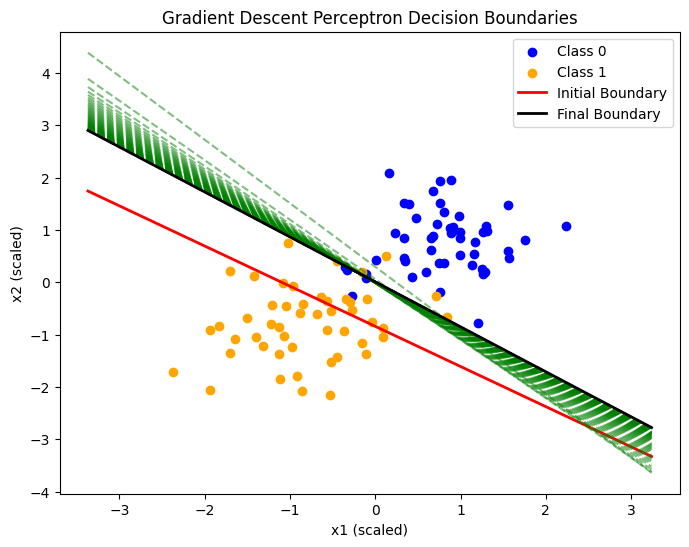

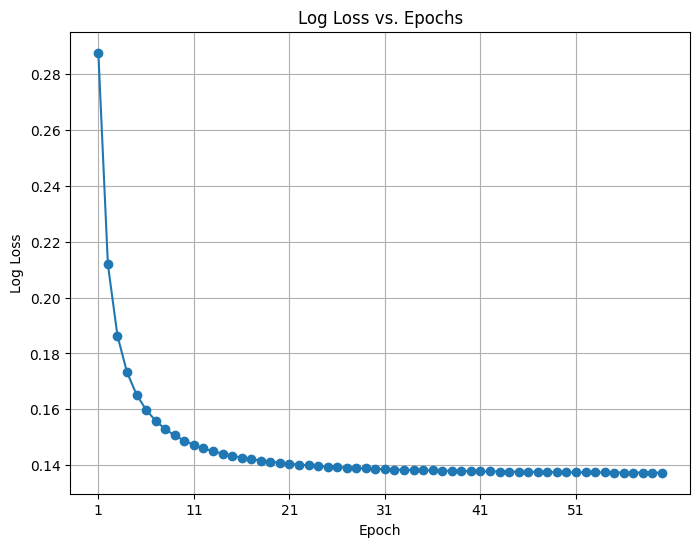

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Helper Functions
def sigmoid(z):
    """Compute the sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))

def log_loss(y_true, y_pred):
    """Compute binary cross-entropy loss."""
    eps = 1e-15  # avoid log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def decision_boundary_line(w, b, x_vals):
    """
    Given weights w and bias b, compute the corresponding x2 values for the decision boundary.
    For logistic regression, the decision boundary is when w·x + b = 0.
    """
    # If w[1] is nearly zero, return a constant line.
    if np.abs(w[1]) < 1e-6:
        return np.full_like(x_vals, -b)
    return -(b + w[0] * x_vals) / w[1]


# 1. Load and Preprocess the Dataset
# Assume data.csv contains three columns: x1, x2, label
# data = pd.read_csv('data.csv')
X = data.iloc[:, :2].values    # features: x1 and x2
y = data.iloc[:, 2].values     # label: 0 or 1

# Optional: Scale features for better convergence.
scaler = StandardScaler()
X = scaler.fit_transform(X)


# 2. Set Hyperparameters
learning_rate = 0.05
epochs = 60
losses = []


# 3. Initialize Weights and Bias
np.random.seed(0)
weights = np.random.rand(2)  # Two features: one weight per input dimension
bias = np.random.rand(1)[0]


# 4. Plot Data and Training Evolution of Decision Boundaries
plt.figure(figsize=(8, 6))

# Plot fixed data points
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='orange', label='Class 1')

# x-values for computing decision boundaries
# (Setting the range based on the data spread)
x_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)

# Plot the initial decision boundary in red (before any updates)
y_initial = decision_boundary_line(weights, bias, x_vals)
plt.plot(x_vals, y_initial, color='red', linewidth=2, label='Initial Boundary')

# -------------------------------
# 5. Train the Perceptron with Gradient Descent
# -------------------------------
for epoch in range(epochs):
    # For each epoch, loop over each sample (stochastic gradient descent update)
    for i in range(len(X)):
        # Compute the linear combination and the sigmoid activation
        z = np.dot(X[i], weights) + bias
        y_pred = sigmoid(z)
        error = y[i] - y_pred

        # Update weights and bias using the gradient descent rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    # Compute predictions over the whole dataset and log loss for this epoch
    preds = sigmoid(np.dot(X, weights) + bias)
    epoch_loss = log_loss(y, preds)
    losses.append(epoch_loss)

    # After each epoch, plot the current decision boundary (dashed green)
    y_boundary = decision_boundary_line(weights, bias, x_vals)
    plt.plot(x_vals, y_boundary, linestyle='--', color='green', alpha=0.5)

    # Optionally, print the log loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Log Loss: {epoch_loss:.4f}")

# Plot the final decision boundary in black after training
y_final = decision_boundary_line(weights, bias, x_vals)
plt.plot(x_vals, y_final, color='black', linewidth=2, label='Final Boundary')

plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')
plt.title('Gradient Descent Perceptron Decision Boundaries')
plt.legend()
plt.show()

# -------------------------------
# 6. Plot the Log Loss vs. Epoch Graph
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(range(1, epochs+1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Epochs')
plt.xticks(range(1, epochs+1, 10))
plt.grid(True)
plt.show()